In [40]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Step 1.1: Load the dataset
df = pd.read_csv('Temprature_data.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (10000, 8)

First 5 rows:


,date,humidity_percent,pressure_hpa,wind_speed_kmph,cloud_cover_percent,rainfall_mm,sunshine_hours,temperature_c
0,2015-01-01,49.963210,1006.154857,29.199932,63.814457,14.945602,10.166839,63.40
1,2015-01-02,96.057145,1003.303847,7.380480,45.929245,4.740889,5.934205,59.14
2,2015-01-03,78.559515,992.330774,13.865588,96.449852,6.317961,2.345587,47.76
3,2015-01-04,67.892679,1022.508667,26.531225,21.897845,9.033556,8.839701,65.66
4,2015-01-05,32.481491,1013.363691,19.283574,58.785642,10.182667,5.024138,65.40


: 

In [42]:
# Step 2: Check dataset information
print("Dataset Info:")
print("="*50)
df.info()

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 10000 non-null  str    
 1   humidity_percent     10000 non-null  float64
 2   pressure_hpa         10000 non-null  float64
 3   wind_speed_kmph      10000 non-null  float64
 4   cloud_cover_percent  10000 non-null  float64
 5   rainfall_mm          10000 non-null  float64
 6   sunshine_hours       10000 non-null  float64
 7   temperature_c        10000 non-null  float64
dtypes: float64(7), str(1)
memory usage: 625.1 KB


In [43]:
# Step 2.1: Check for missing values
print("\nMissing Values:")
print("="*50)
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")


Missing Values:
date                   0
humidity_percent       0
pressure_hpa           0
wind_speed_kmph        0
cloud_cover_percent    0
rainfall_mm            0
sunshine_hours         0
temperature_c          0
dtype: int64

Total missing values: 0


In [44]:
# Step 2.2: Statistical summary
print("\nStatistical Summary:")
print("="*50)
df.describe()


Statistical Summary:


,humidity_percent,pressure_hpa,wind_speed_kmph,cloud_cover_percent,rainfall_mm,sunshine_hours,temperature_c
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,59.532765,1015.317091,20.002016,49.871338,24.843190,6.037735,57.919811
std,23.010410,20.250619,11.470950,28.899459,14.464209,3.460095,7.200946
min,20.000931,980.011042,0.001925,0.000554,0.000837,0.000101,34.300000
25%,39.706310,997.776206,10.149916,24.685725,12.213611,3.083478,52.900000
50%,59.402289,1015.412774,20.082724,50.003024,24.685860,6.073085,57.870000
75%,79.200508,1032.953545,29.786954,74.711625,37.523852,9.041352,62.950000
max,99.977414,1049.994738,39.996039,99.978937,49.998607,11.999276,82.230000


In [45]:
# Step 3: Correlation Analysis
print("Correlation with Temperature:")
print("="*50)
# Drop date column for correlation
numeric_df = df.drop('date', axis=1)
correlation = numeric_df.corr()['temperature_c'].sort_values(ascending=False)
print(correlation)

Correlation with Temperature:
temperature_c          1.000000
sunshine_hours         0.440891
pressure_hpa           0.134190
wind_speed_kmph       -0.153020
humidity_percent      -0.485846
cloud_cover_percent   -0.490800
rainfall_mm           -0.506073
Name: temperature_c, dtype: float64


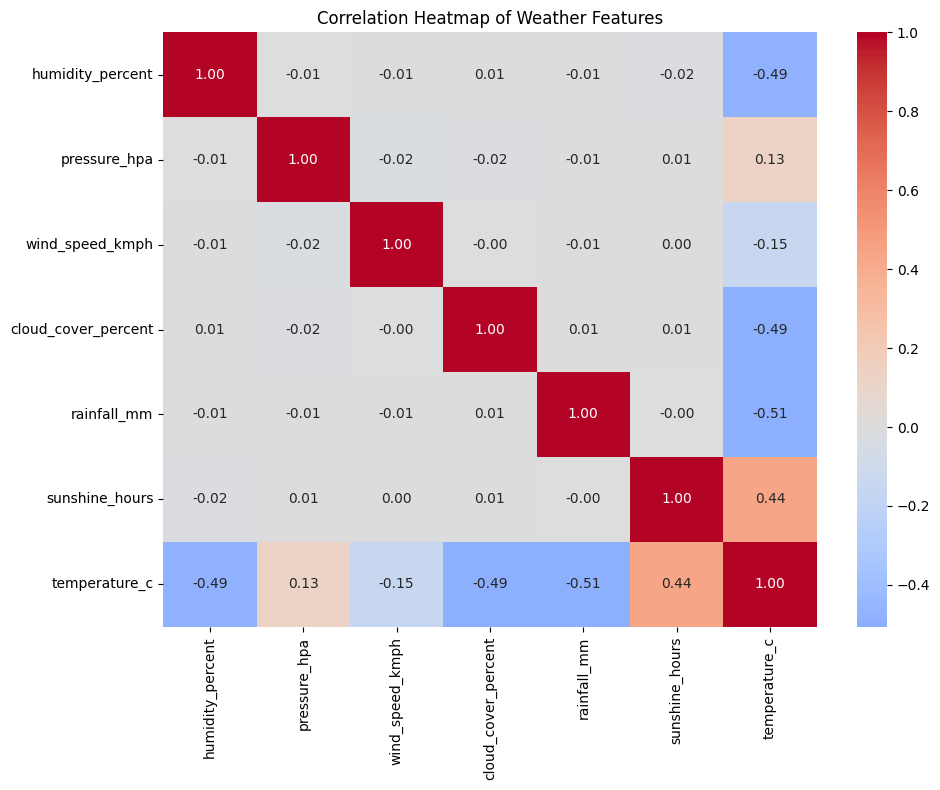

In [46]:
# Step 3.1: Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Weather Features')
plt.tight_layout()
plt.show()

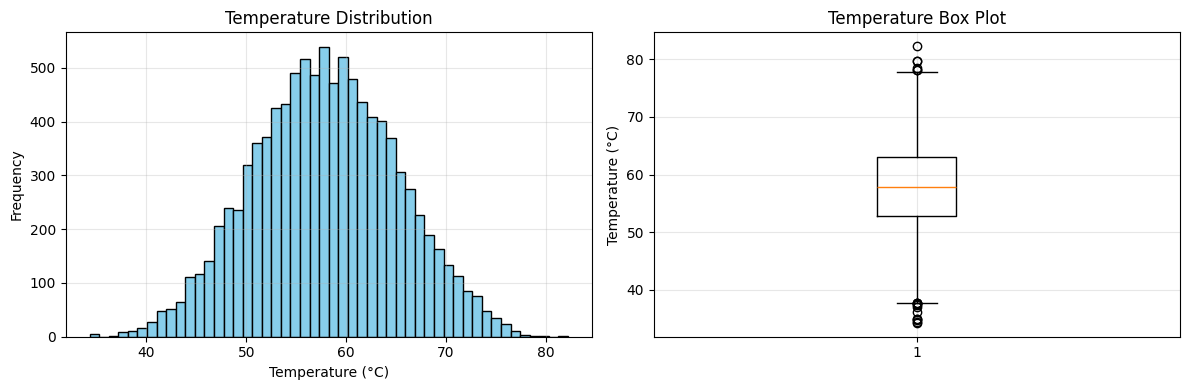

Temperature range: 34.30°C to 82.23°C
Mean temperature: 57.92°C


In [47]:
# Step 3.2: Temperature distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['temperature_c'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['temperature_c'])
plt.ylabel('Temperature (°C)')
plt.title('Temperature Box Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Temperature range: {df['temperature_c'].min():.2f}°C to {df['temperature_c'].max():.2f}°C")
print(f"Mean temperature: {df['temperature_c'].mean():.2f}°C")

In [48]:
# Step 4: Prepare features and target
# Features (X): All columns except date and temperature_c
# Target (y): temperature_c

X = df.drop(['date', 'temperature_c'], axis=1)
y = df['temperature_c']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures used for prediction:")
print(X.columns.tolist())

Features shape: (10000, 6)
Target shape: (10000,)

Features used for prediction:
['humidity_percent', 'pressure_hpa', 'wind_speed_kmph', 'cloud_cover_percent', 'rainfall_mm', 'sunshine_hours']


In [49]:
# Step 4.1: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print(f"\nSplit ratio: 80% train, 20% test")

Training set size: 8000
Testing set size: 2000

Split ratio: 80% train, 20% test


In [50]:
# Step 4.2: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")
print(f"Mean of scaled training data: {X_train_scaled.mean():.4f}")
print(f"Std of scaled training data: {X_train_scaled.std():.4f}")

✓ Features scaled using StandardScaler
Mean of scaled training data: 0.0000
Std of scaled training data: 1.0000


In [51]:
# Step 5: Train Linear Regression Model
print("Training Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

print("✓ Linear Regression Model trained successfully!")

Training Linear Regression Model...
✓ Linear Regression Model trained successfully!


In [52]:
# Step 6: Evaluate Linear Regression Model
print("\nLinear Regression Model Performance:")
print("="*50)

# Calculate metrics
r2 = r2_score(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae = mean_absolute_error(y_test, y_pred_lr)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}°C")
print(f"MAE: {mae:.4f}°C")

# Store for visualization
lr_r2, lr_rmse, lr_mae = r2, rmse, mae


Linear Regression Model Performance:
R² Score: 0.9576
RMSE: 1.4867°C
MAE: 1.1816°C


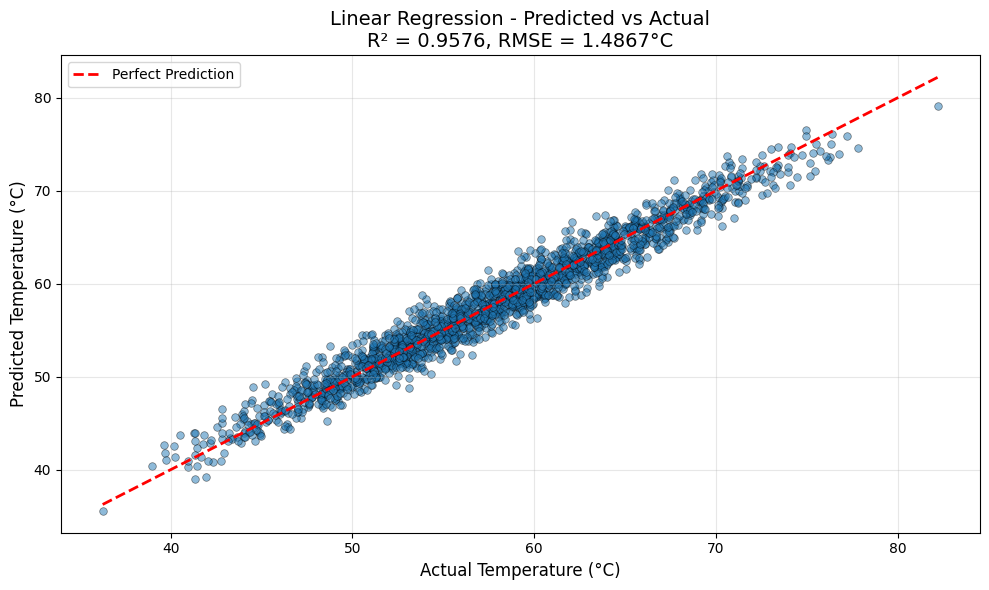

In [53]:
# Step 6.1: Visualize predictions vs actual
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_lr, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature (°C)', fontsize=12)
plt.ylabel('Predicted Temperature (°C)', fontsize=12)
plt.title(f'Linear Regression - Predicted vs Actual\nR² = {lr_r2:.4f}, RMSE = {lr_rmse:.4f}°C', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

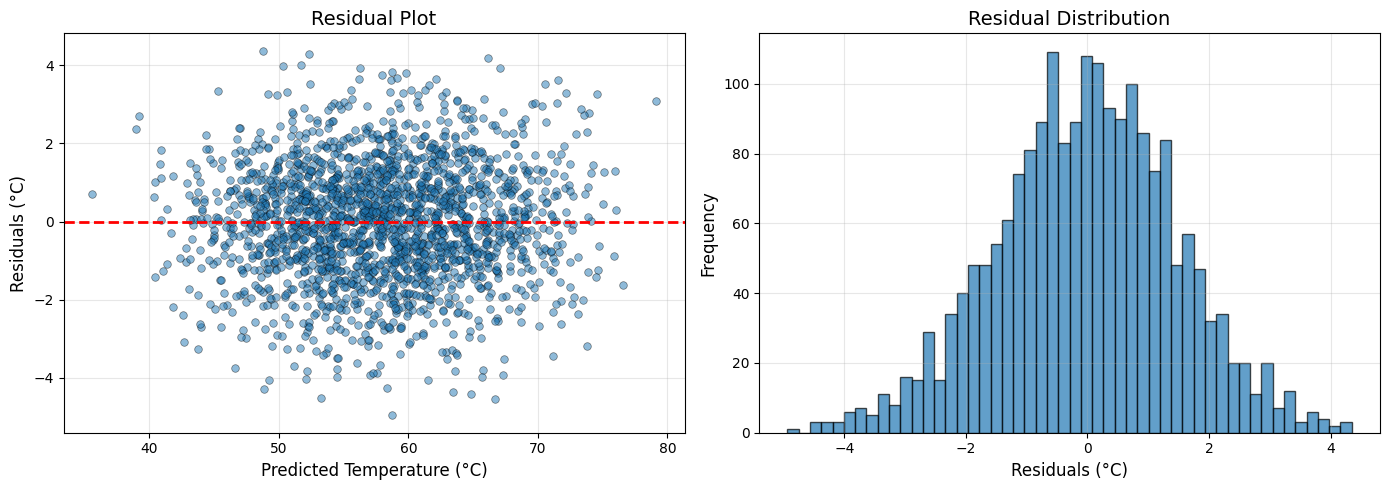


Residual Statistics:
Mean of residuals: -0.0273°C
Std of residuals: 1.4868°C


In [54]:
# Step 6.2: Residual Analysis
residuals = y_test - y_pred_lr

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual plot
axes[0].scatter(y_pred_lr, residuals, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Temperature (°C)', fontsize=12)
axes[0].set_ylabel('Residuals (°C)', fontsize=12)
axes[0].set_title('Residual Plot', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Residual distribution
axes[1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residuals (°C)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Residual Distribution', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResidual Statistics:")
print(f"Mean of residuals: {residuals.mean():.4f}°C")
print(f"Std of residuals: {residuals.std():.4f}°C")

In [57]:
# Check Standard Deviations
print("STANDARD DEVIATION ANALYSIS")
print("="*70)

print("\n1. Original Features Standard Deviation:")
print("-"*70)
std_df = pd.DataFrame({
    'Feature': df.select_dtypes(include=[np.number]).columns,
    'Std Dev': df.select_dtypes(include=[np.number]).std()
})
print(std_df.to_string(index=False))

print("\n\n2. Target Variable (Temperature):")
print("-"*70)
print(f"Temperature Mean: {df['temperature_c'].mean():.4f}°C")
print(f"Temperature Std Dev: {df['temperature_c'].std():.4f}°C")
print(f"Coefficient of Variation: {(df['temperature_c'].std() / df['temperature_c'].mean() * 100):.2f}%")

print("\n\n3. Scaled Training Data:")
print("-"*70)
print(f"Mean of scaled features: {X_train_scaled.mean():.4f}")
print(f"Std Dev of scaled features: {X_train_scaled.std():.4f}")

print("\n\n4. Model Residuals:")
print("-"*70)
print(f"Residuals Mean: {residuals.mean():.4f}°C")
print(f"Residuals Std Dev: {residuals.std():.4f}°C")

STANDARD DEVIATION ANALYSIS

1. Original Features Standard Deviation:
----------------------------------------------------------------------
            Feature   Std Dev
   humidity_percent 23.010410
       pressure_hpa 20.250619
    wind_speed_kmph 11.470950
cloud_cover_percent 28.899459
        rainfall_mm 14.464209
     sunshine_hours  3.460095
      temperature_c  7.200946


2. Target Variable (Temperature):
----------------------------------------------------------------------
Temperature Mean: 57.9198°C
Temperature Std Dev: 7.2009°C
Coefficient of Variation: 12.43%


3. Scaled Training Data:
----------------------------------------------------------------------
Mean of scaled features: 0.0000
Std Dev of scaled features: 1.0000


4. Model Residuals:
----------------------------------------------------------------------
Residuals Mean: -0.0273°C
Residuals Std Dev: 1.4868°C


In [59]:
# Step 7: Add New Entry and Predict Temperature
print("PREDICTING TEMPERATURE FOR NEW WEATHER DATA")
print("="*70)

# Create a new weather data entry
new_data = pd.DataFrame({
    'humidity_percent': [65.0],
    'pressure_hpa': [1015.0],
    'wind_speed_kmph': [20.0],
    'cloud_cover_percent': [50.0],
    'rainfall_mm': [10.0],
    'sunshine_hours': [6.5]
})

print("\nNew Weather Data Entry:")
print("-"*70)
print(new_data.to_string(index=False))

# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Make prediction
predicted_temp = lr_model.predict(new_data_scaled)[0]

print(f"\n{'='*70}")
print(f"PREDICTED TEMPERATURE: {predicted_temp:.2f}°C")
print(f"{'='*70}")

# Show comparison with dataset statistics
print(f"\nDataset Temperature Statistics:")
print(f"  Minimum: {df['temperature_c'].min():.2f}°C")
print(f"  Mean: {df['temperature_c'].mean():.2f}°C")
print(f"  Maximum: {df['temperature_c'].max():.2f}°C")
print(f"\nPredicted temperature is within the expected range!" if df['temperature_c'].min() <= predicted_temp <= df['temperature_c'].max() else "\nWarning: Predicted temperature is outside the training range!")

PREDICTING TEMPERATURE FOR NEW WEATHER DATA

New Weather Data Entry:
----------------------------------------------------------------------
 humidity_percent  pressure_hpa  wind_speed_kmph  cloud_cover_percent  rainfall_mm  sunshine_hours
             65.0        1015.0             20.0                 50.0         10.0             6.5

PREDICTED TEMPERATURE: 61.20°C

Dataset Temperature Statistics:
  Minimum: 34.30°C
  Mean: 57.92°C
  Maximum: 82.23°C

Predicted temperature is within the expected range!


In [66]:
# Step 8: Check for Negative Values with Exception Handling

# Define custom exception for negative values
class NegativeValueError(Exception):
    """Custom exception raised when negative values are found in the dataset"""
    def __init__(self, column, count, message="Negative values found in dataset"):
        self.column = column
        self.count = count
        self.message = f"{message}: {count} negative value(s) in column '{column}'"
        super().__init__(self.message)

def check_negative_values(dataframe):
    """Check for negative values in numeric columns"""
    print("CHECKING FOR NEGATIVE VALUES")
    print("="*70)
    
    numeric_cols = dataframe.select_dtypes(include=[np.number]).columns
    negative_found = False
    negative_summary = []
    
    try:
        for col in numeric_cols:
            negative_count = (dataframe[col] < 0).sum()
            
            if negative_count > 0:
                negative_found = True
                negative_rows = dataframe[dataframe[col] < 0].index.tolist()
                negative_summary.append({
                    'Column': col,
                    'Negative Count': negative_count,
                    'Rows': negative_rows[:10]  # Show first 10
                })
                
                # Raise exception for negative values
                raise NegativeValueError(col, negative_count)
        
        # If no negative values found
        if not negative_found:
            print("✓ No negative values found in the dataset!")
            print("All numeric columns contain valid non-negative values.")
            return True
            
    except NegativeValueError as e:
        print(f"❌ ERROR: {e.message}")
        print("\nNegative Values Summary:")
        print("-"*70)
        
        for item in negative_summary:
            print(f"\nColumn: {item['Column']}")
            print(f"  Negative Count: {item['Negative Count']}")
            print(f"  Found in rows: {item['Rows']}")
            if len(dataframe[dataframe[item['Column']] < 0]) > 10:
                print(f"  ... and {len(dataframe[dataframe[item['Column']] < 0]) - 10} more rows")
        
        print("\n" + "="*70)
        print("ACTION REQUIRED: Please clean the data before proceeding!")
        print("="*70)
        return False
    
    except Exception as e:
        print(f"Unexpected error occurred: {e}")
        return False

# Run the check
result = check_negative_values(df)

CHECKING FOR NEGATIVE VALUES
✓ No negative values found in the dataset!
All numeric columns contain valid non-negative values.


In [67]:
# Reload the CSV file to check for negative values you added manually
print("Reloading CSV file to check for manually added negative values...")
print("="*70)

try:
    df_fresh = pd.read_csv('Temprature_data.csv')
    print(f"✓ File reloaded successfully: {df_fresh.shape}")
    print("\nRunning negative value check on fresh data...\n")
    
    # Check for negative values in the fresh data
    check_negative_values(df_fresh)
    
except FileNotFoundError:
    print("❌ Error: Temprature_data.csv file not found!")
except Exception as e:
    print(f"❌ Error loading file: {e}")

Reloading CSV file to check for manually added negative values...
✓ File reloaded successfully: (10000, 8)

Running negative value check on fresh data...

CHECKING FOR NEGATIVE VALUES
✓ No negative values found in the dataset!
All numeric columns contain valid non-negative values.


In [68]:
# Demonstration: Create test data with negative values to show exception handling
print("DEMONSTRATION: Testing Exception Handling with Negative Values")
print("="*70)

# Create a test dataframe with some negative values
df_test = df_fresh.copy()

# Manually add some negative values for demonstration
df_test.loc[10, 'temperature_c'] = -5.0
df_test.loc[25, 'humidity_percent'] = -15.0
df_test.loc[50, 'pressure_hpa'] = -1020.0
df_test.loc[100, 'rainfall_mm'] = -8.5

print("Added negative values to test dataset at rows: 10, 25, 50, 100")
print("\nNow checking for negative values...\n")

# Run the check - this should trigger the exception
result = check_negative_values(df_test)

DEMONSTRATION: Testing Exception Handling with Negative Values
Added negative values to test dataset at rows: 10, 25, 50, 100

Now checking for negative values...

CHECKING FOR NEGATIVE VALUES
❌ ERROR: Negative values found in dataset: 1 negative value(s) in column 'humidity_percent'

Negative Values Summary:
----------------------------------------------------------------------

Column: humidity_percent
  Negative Count: 1
  Found in rows: [25]

ACTION REQUIRED: Please clean the data before proceeding!
